<h1 align="center">Performance Robustness Evaluation for Statistical Classifiers </h1> 

# Issue \#7 - Visualization for misclassifications (by Alberginia)

## Introduction

The goal of this contribution is to **develop tools to visualize the missclassified points** to analyse their characteristics. In particular, to understand **which parameter values do the missclassified points tend to have** by visualizing them in the parameter histograms, and also which values they take when combining pairs of parameters by visualizing them in the two-parameter projections. 

Depending on the problem, it is useful to focus on different aspects, so the idea is to be able to visualize in all plots these 3 kinds of information:
  
1. **hits-fails**: 

    This option has two classes: the **correctly classified** points, and the **missclassified** points. This allows to visualize the **overall distributions of correctly classified points vs missclassified points**.

  
2. **which-fail**: 

   This option yields the same number of classes as the original dataset plus one: the **correctly classified** points on one hand, and the **classes of the missclassified** points on the other. This allows to visualize **which combination of values make each class to be missclassified**.

  
3. **which-hit**:  

   This option yields the same number of classes as the original dataset plus one: the **missclassified** points on one hand, and the **classes of the correctly classified** points on the other. This allows to visualize **which combination of values make each class to be correctly classified**.
   

    
Below, a graphical explanation to clarify the analysis that can be carried out depending on the selected option of the function (the confusion matrix has been obtained from the analysis carried out to the winequality.csv dataset).

<table class="tg">
  <tr>
      <th><p>'hits-fails' option</p></th>
      <th><p>'which-fail' option</p></th>
      <th><p>'which-hit' option</p></th>
  </tr>
  <tr>
    <th><img src="img/winequality_confusion_matrix_hits-fails.png" alt="'hits-fails' option" width="300"> </th>
    <th><img src="img/winequality_confusion_matrix_which-fail.png" alt="'which-fail' option" width="300">
</th>
    <th><img src="img/winequality_confusion_matrix_which-hit.png" alt="'which-hit' option" width="300"> </th>
  </tr>
</table>

This visualization tool will be applied to the analysis of missclassifications in the **winequality.csv**, **vehicles.csv** and **defaults.csv** samples.

## Functions and code
  
I've implemented a new function that allows to redefine the class column in the datasets for new classes with the aforementioned 3 options:

* predictions_to_class(X_test, y_test, y_predicted, new_classes="hits-fails")
    
Since I already wrote several functions for issue #2 that plotted the points with different colors depending on their class, I've been able to reuse them here for this issue with only some improvements:
* histograms(dataset, dataset_name, stacked_classes, grid=3, bins=11):
* histograms_specific(dataset, dataset_name, stacked_classes, list_of_variables, grid=3, bins=11)
* histograms_all(dataset, dataset_name, stacked_classes, grid=3, binsmentioned=11)  
   
   
* projections(dataset, dataset_name, grid=3)
* projections_specific(dataset, dataset_name, list_of_variables)
* projections_all(dataset, dataset_name, grid=2)
  
The new function has been included in the "missclassification_visuals.py" file, the reused ones are where they were already in the "data_exploration.py" file.

In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

from data_exploration import *
from missclassification_visuals import *

In [2]:
dataset_names = ("generated", "vehicles", "eeg", "winequality", "defaults")
dataset_files = ["../../datasets/" + dataset_names[x] + ".csv" for x in range(len(dataset_names))]

# winequality.csv
## Train the classification model (winequality.csv)
A detailed description of this training section is already included in the jupyter notebook **alberginia_issue2_5datasets.ipynb**.

In [3]:
dataset, dataset_name = load_file(dataset_files[3])
dataset = dataset.drop(columns=["quality"])

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5806, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(kernel="linear", decision_function_shape="ovr", class_weight="balanced")
classifier.fit(X_train_scaled, y_train)
y_predicted = classifier.predict(X_test_scaled)

## Visualization of missclassifications (winequality.csv)
As a reference, I plot here the commonly represented confusion matrix.

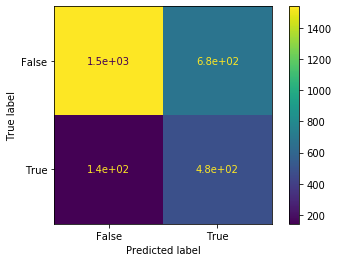

In [4]:
figure = plot_confusion_matrix(classifier, X_test_scaled, y_test)
plt.savefig(dataset_name+"/"+dataset_name+"_confusion_matrix.svg")

Here I construct three datasets, one for every option of new_classes: **hits-fails**, **which-hit** and **which-fail**.

In [5]:
dataset_hits_fails = predictions_to_class(X_test, y_test, y_predicted, new_classes="hits-fails")
dataset_which_hit = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-hit")
dataset_which_fail = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-fail")

### Histograms
Examples of the different options with the histograms for only two parameters (alcohol and pH). Overlapped histograms allow to compare the shapes of the distributions as long as there are only a few classes. Otherwise stacked histograms allow for a better assessment. Note that **this dataset is not balanced** which may lead to misleading accuracies of each class. However, the shapes of the distributions should still provide reliable information.


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



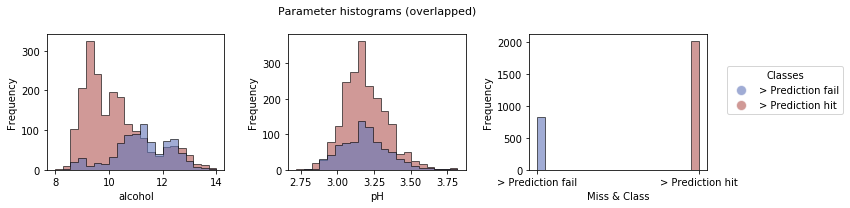


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



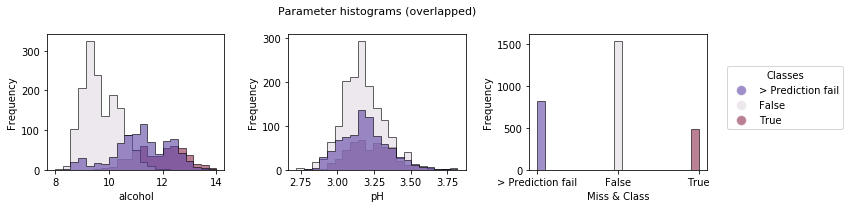


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



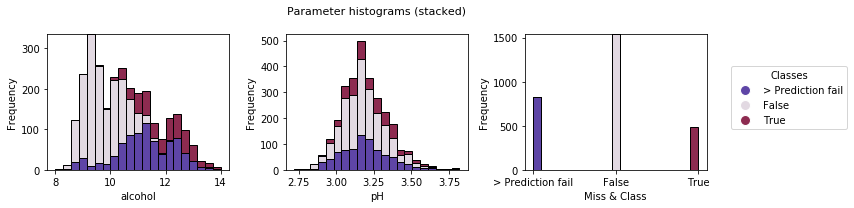


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



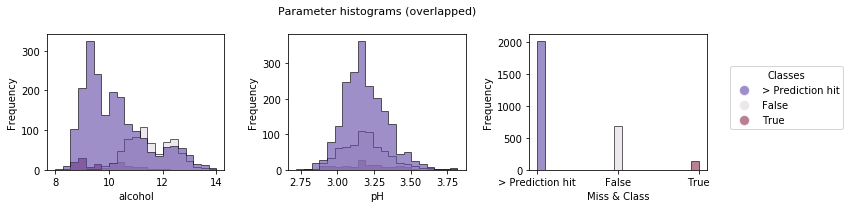


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



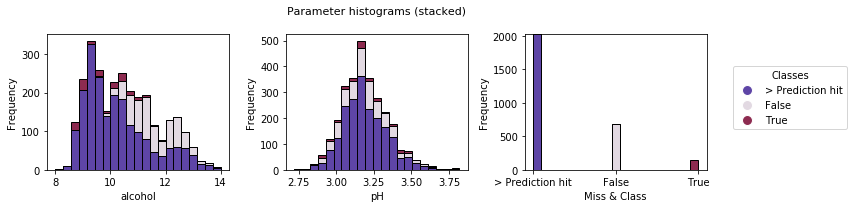

In [6]:
histograms_specific(dataset_hits_fails, dataset_name+"_missclass_hits_fails", False, ["alcohol", "pH"], grid=3, bins=21)
histograms_specific(dataset_which_hit, dataset_name+"_missclass_which_hit", False, ["alcohol", "pH"], grid=3, bins=21)
histograms_specific(dataset_which_hit, dataset_name+"_missclass_which_hit", True, ["alcohol", "pH"], grid=3, bins=21)
histograms_specific(dataset_which_fail, dataset_name+"_missclass_which_fail", False, ["alcohol", "pH"], grid=3, bins=21)
histograms_specific(dataset_which_fail, dataset_name+"_missclass_which_fail", True, ["alcohol", "pH"], grid=3, bins=21)

#### Conclusions from the histograms for winequality.csv
* From the different representations it is clear that alcohol content is a **determinant parameter** in order to predict the quality of the wine. 
* For missclassifications there is a bias towards higher alcohol content, while the quality of wines with lower alcohol content is usually well predicted.
* There are almost no quality wines wrongly predicted for lower alcohol content. 
* There is **no difference** on the pH for the correctly classified and missclassified points. All distributions have a similar shape.

### 2D projections
Examples of the different options with the projections for only four parameters (alcohol, volatile acidity, pH and chlorides). Note that **this dataset is not balanced** which may lead to misleading accuracies of each class. However, the distributions still provide meaningful information.


There are 11 variables in this dataset.
Only the crossed projections of 4 parameters at a time will be plotted.


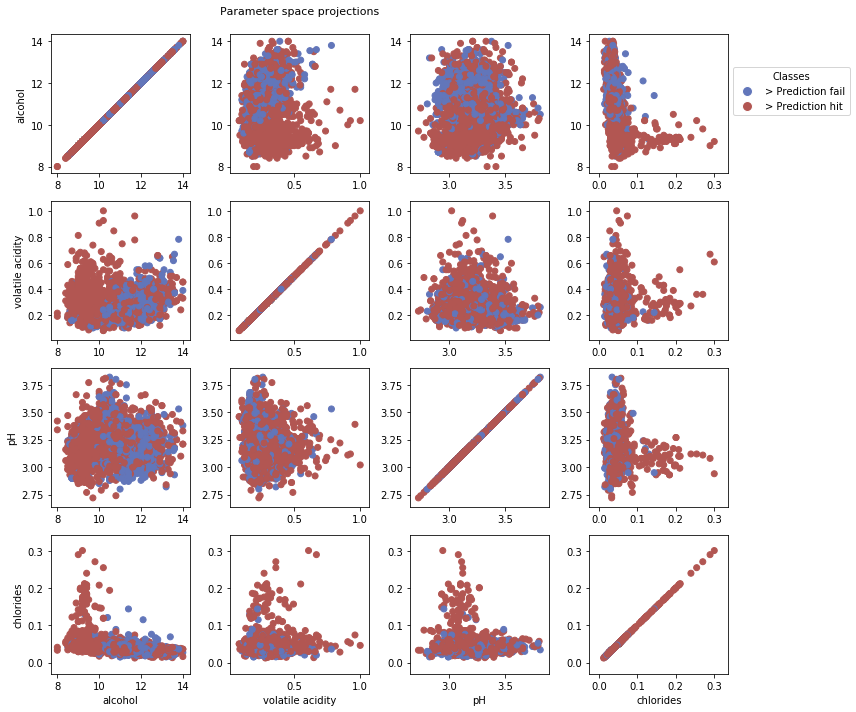


There are 11 variables in this dataset.
Only the crossed projections of 4 parameters at a time will be plotted.


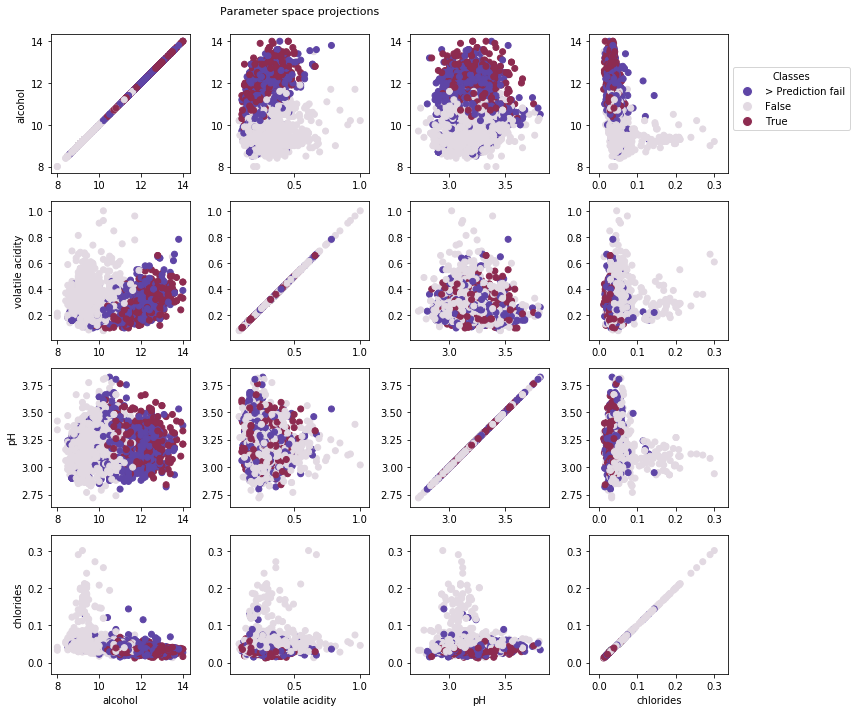


There are 11 variables in this dataset.
Only the crossed projections of 4 parameters at a time will be plotted.


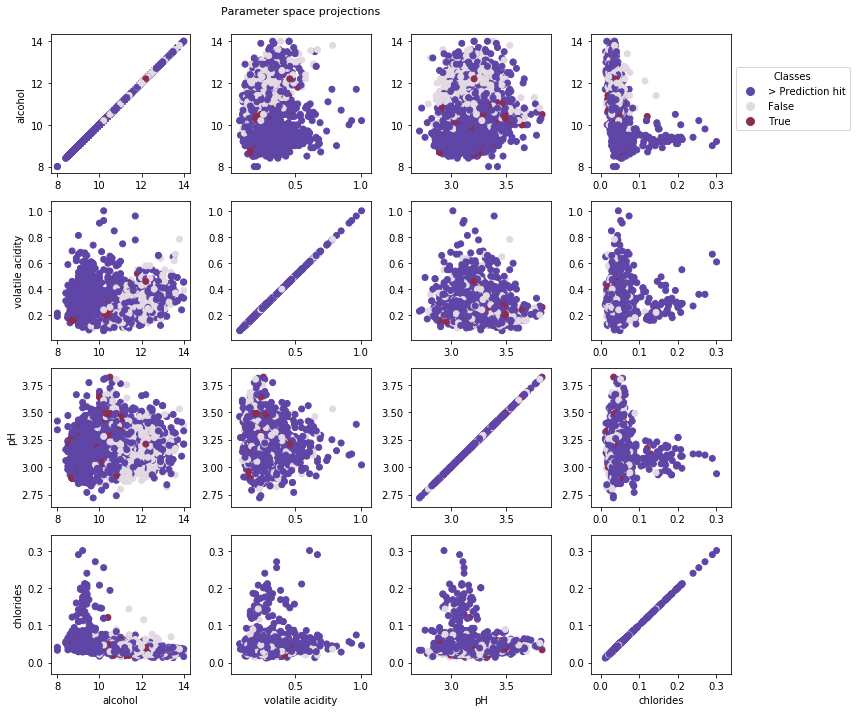

In [7]:
projections_specific(dataset_hits_fails, dataset_name+"_missclass_hits_fails", ["alcohol", "volatile acidity", "pH", "chlorides"])
projections_specific(dataset_which_hit, dataset_name+"_which_hit", ["alcohol", "volatile acidity", "pH", "chlorides"])
projections_specific(dataset_which_fail, dataset_name+"_which_fail", ["alcohol", "volatile acidity", "pH", "chlorides"])

#### Conclusions from the projections for winequality.csv
* From the different projections it can be seen that missclassified points don't have any particular combination of pH and chloride values. They have evenly distributed combinations of these parameters.
* The other combinations of the parameters that have been chosen here do indeed show a clear distinction. It is clear that missclassifications for poor quality wine, occurs more often with higher alcohol content, agreeing with the previous observations. 
* Missclassifications for higher quality wine do not show this distinction.

-----

# vehicles.csv
### Train the classification model (vehicles.csv)
A detailed description of this part is already included in the jupyter notebook **alberginia_issue2_5datasets.ipynb**.

In [8]:
dataset, dataset_name = load_file(dataset_files[1])

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(kernel='linear', decision_function_shape='ovo')
classifier.fit(X_train_scaled, y_train)
y_predicted = classifier.predict(X_test_scaled)

### Visualization of missclassifications (vehicles.csv)
As a reference, I plot here the commonly represented confusion matrix.

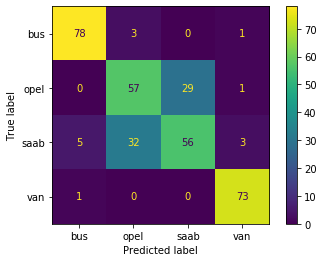

In [9]:
plot_confusion_matrix(classifier, X_test_scaled, y_test)
plt.savefig(dataset_name+"/"+dataset_name+"_confusion_matrix.png")

Here I construct three datasets, one for every option of new_classes: **hits-fails**, **which-hit** and **which-fail**.

In [10]:
dataset_hits_fails = predictions_to_class(X_test, y_test, y_predicted, new_classes="hits-fails")
dataset_which_hit = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-hit")
dataset_which_fail = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-fail")

### Histograms and projections
Examples of the different options with histograms for five geometrical parameters (circularity, radius ratio, scatter ratio, maximum length renctangularity, and hollows ratio) and projections with four (all the previous ones except circularity).


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



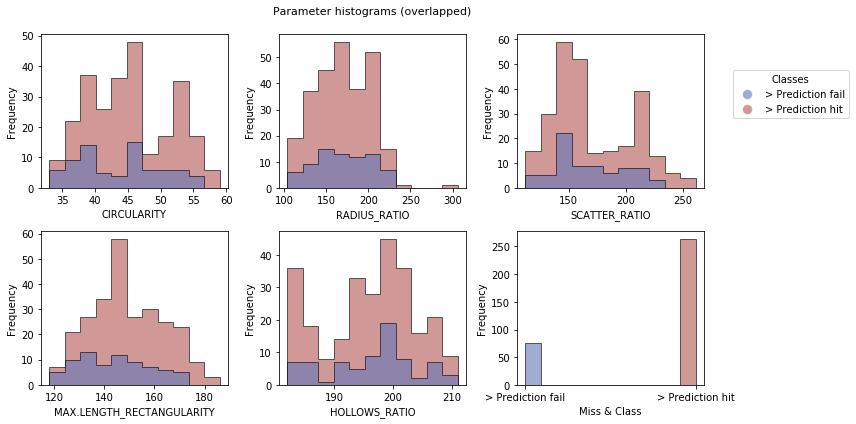


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



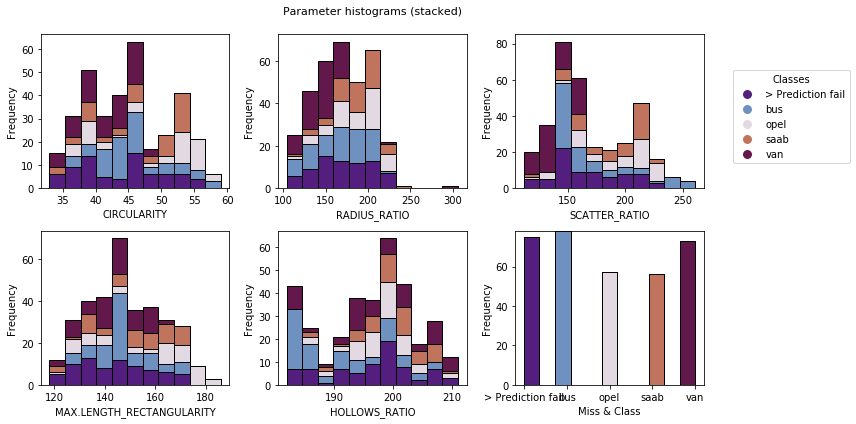


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



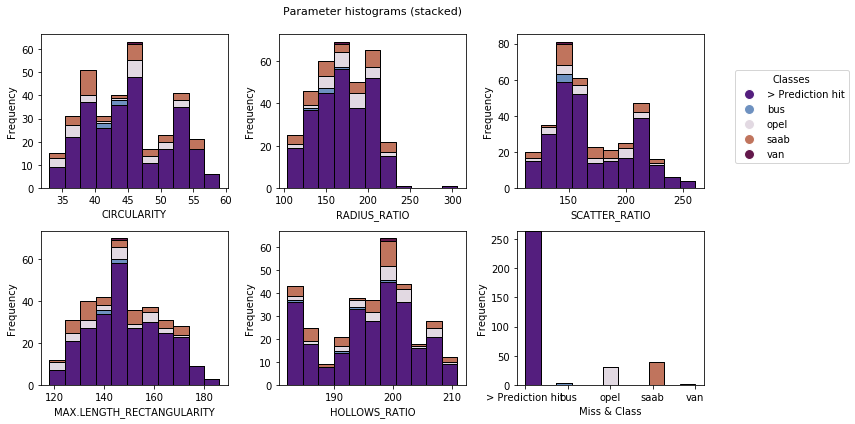

In [11]:
histograms_specific(dataset_hits_fails, dataset_name+"_missclass_hits_fails", False, ["CIRCULARITY", "RADIUS_RATIO", "SCATTER_RATIO", "MAX.LENGTH_RECTANGULARITY","HOLLOWS_RATIO"], grid=3, bins=11)
histograms_specific(dataset_which_hit, dataset_name+"_missclass_which_hit", True, ["CIRCULARITY", "RADIUS_RATIO", "SCATTER_RATIO", "MAX.LENGTH_RECTANGULARITY","HOLLOWS_RATIO"], grid=3, bins=11)
histograms_specific(dataset_which_fail, dataset_name+"_missclass_which_fail", True, ["CIRCULARITY", "RADIUS_RATIO", "SCATTER_RATIO", "MAX.LENGTH_RECTANGULARITY","HOLLOWS_RATIO"], grid=3, bins=11)


There are 18 variables in this dataset.
Only the crossed projections of 4 parameters at a time will be plotted.


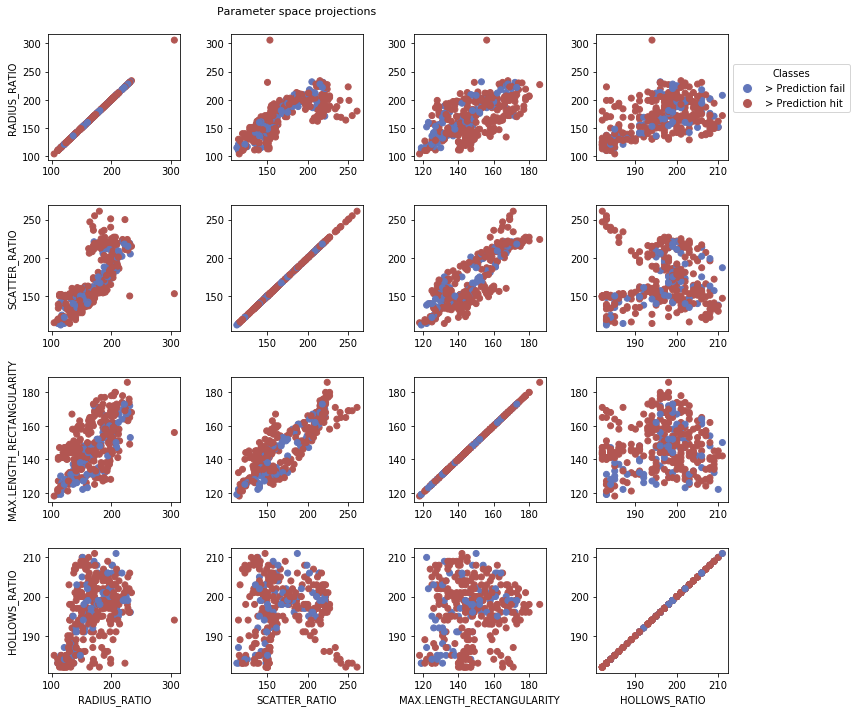


There are 18 variables in this dataset.
Only the crossed projections of 4 parameters at a time will be plotted.


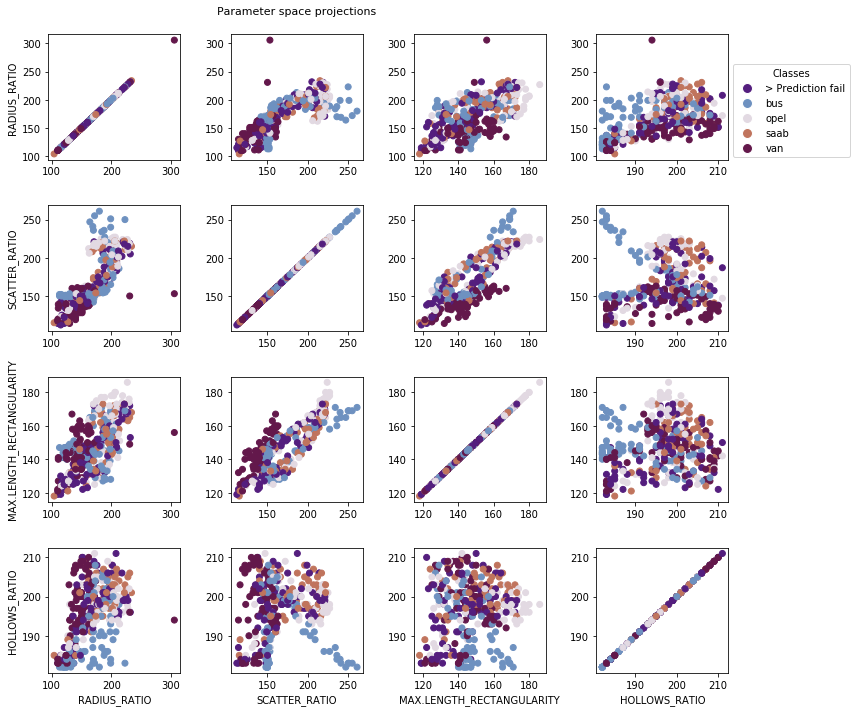


There are 18 variables in this dataset.
Only the crossed projections of 4 parameters at a time will be plotted.


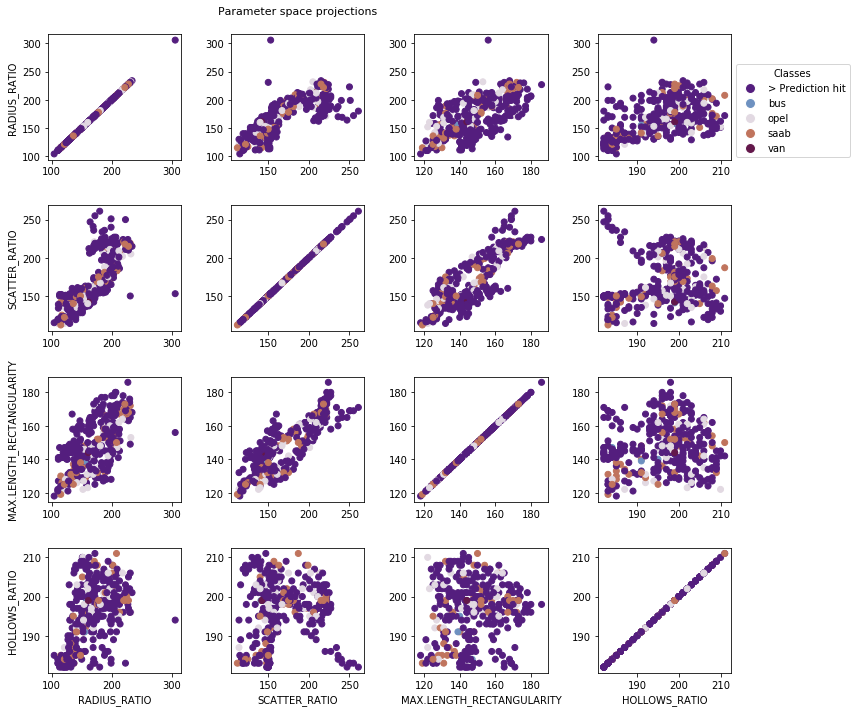

In [12]:
projections_specific(dataset_hits_fails, dataset_name+"_missclass_hits_fails", ["RADIUS_RATIO", "SCATTER_RATIO", "MAX.LENGTH_RECTANGULARITY", "HOLLOWS_RATIO"]) #
projections_specific(dataset_which_hit, dataset_name+"_missclass_which_hit", ["RADIUS_RATIO", "SCATTER_RATIO", "MAX.LENGTH_RECTANGULARITY", "HOLLOWS_RATIO"]) #
projections_specific(dataset_which_fail, dataset_name+"_missclass_which_fail", ["RADIUS_RATIO", "SCATTER_RATIO", "MAX.LENGTH_RECTANGULARITY", "HOLLOWS_RATIO"]) #


#### Conclusions for winequality.csv
* Missclassificated points have flat centered quite homogeneous distributions, which means that they show a variety of parameter values. 
* Vehicles with more extreme values in the parameters are normally classified correctly.
* As can be seen in the last set of projections, missclassifications are mainly due to the opel and saab classes which have intermediate values for many of the parameters. 
* Many distinct clusters of points can be identified for the correcly classified points, missclassifications are more evenly distributed.

______

# defaults.csv
### Train the classification model (defaults.csv)
A detailed description of this part is already included in the jupyter notebook **alberginia_issue2_5datasets.ipynb**.

In [13]:
dataset, dataset_name = load_file(dataset_files[4])
# Readjust "pay" values to range from -1 to 9
dataset.iloc[:,6:12] = dataset.iloc[:,6:12].add(1)

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3636, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(kernel="linear", decision_function_shape="ovr", class_weight="balanced")
classifier.fit(X_train_scaled, y_train)
y_predicted = classifier.predict(X_test_scaled)

### Visualization of missclassifications (defaults.csv)
As a reference, I plot here the commonly represented confusion matrix.

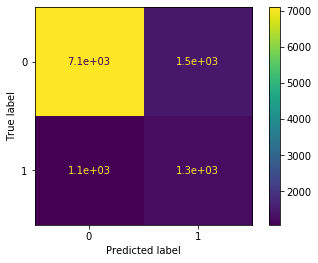

In [14]:
plot_confusion_matrix(classifier, X_test_scaled, y_test)

Here I construct three datasets, one for every option of new_classes: **hits-fails**, **which-hit** and **which-fail**.

In [15]:
dataset_hits_fails = predictions_to_class(X_test, y_test, y_predicted, new_classes="hits-fails")
dataset_which_hit = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-hit")
dataset_which_fail = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-fail")

### Histograms and projections
Examples of two relevant histograms for the "defaults" sample (marrital status and payment status for last month) and projections of three parameters(bill amount for last month and the previous, and amount of last month payment). This sample has many discrete parameters for which this particular visualization is not suitable (because points overlap for discrete variables).


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



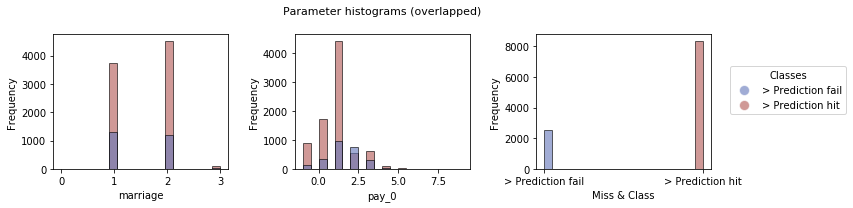


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



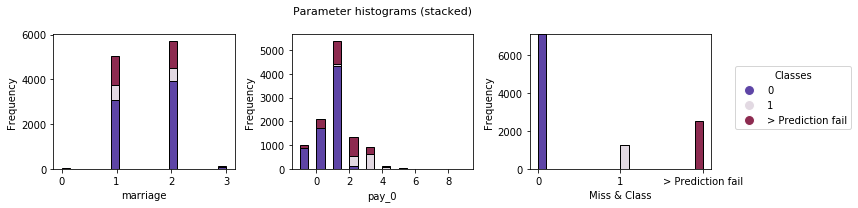


You chose a 3x3 grid, the histograms will be calculated maximum 9 at a time.



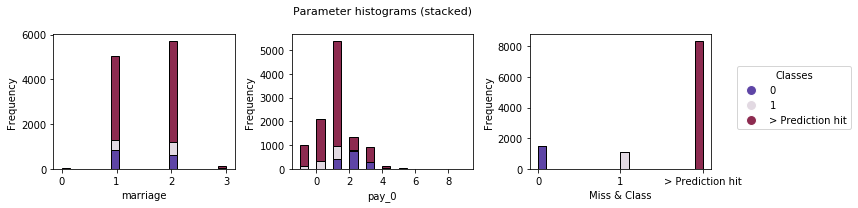

In [16]:
histograms_specific(dataset_hits_fails, dataset_name+"_missclass_hits_fails", False, ["marriage", "pay_0"], grid=3, bins=20)
histograms_specific(dataset_which_hit, dataset_name+"_missclass_which_hit", True,["marriage", "pay_0"], grid=3, bins=20)
histograms_specific(dataset_which_fail, dataset_name+"_missclass_which_fail", True, ["marriage", "pay_0"], grid=3, bins=20)


There are 24 variables in this dataset.
Only the crossed projections of 3 parameters at a time will be plotted.


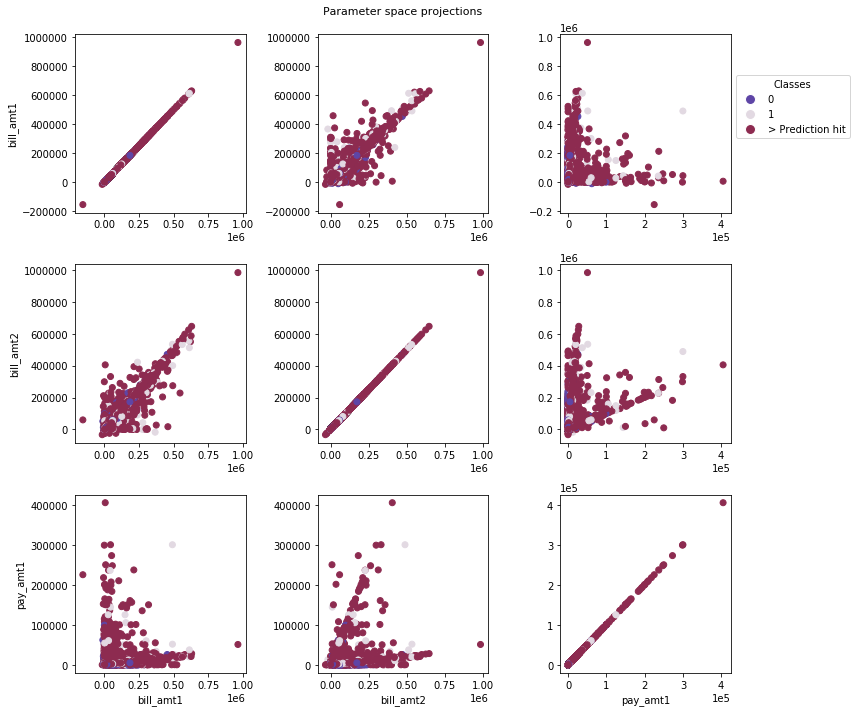

In [17]:
projections_specific(dataset_which_fail, dataset_name+"_missclass_which_fail",  ["bill_amt1", "bill_amt2", "pay_amt1"])


#### Conclusions for defaults.csv
* Predictions of payment defaulting are slightly harder to do for married people than for single people.
* Missclassifications happen mostly for clients who paid their last bill promtply but end up defaulting, and for clients who didn't pay promptly but don't default nonetheless. 
* Bill amounts for last month are highly correlated to those for the one before last, specially for high amounts (clients tend to spend similar amounts from month to month). 
* The amount paid last month has a double-branched correlation, there's a group of clients who pay a very small proportion of the bill regardless of the amount, and there's another group of clients who tends to pay the same amount they spent the one before last month.
* Missclassified clients do not belong to the group of clients that pays a small amount regardless of the bill.
* There are almost no missclassifications of non-defaulting clients, and the missclassifications of defaulting ones don't seem to correlate with any of these three variables, apart from what was just mentioned.